# How to find the perfect Gift (The Nerdy way)

## Choose the best gift for your loved one (using the power of Python)

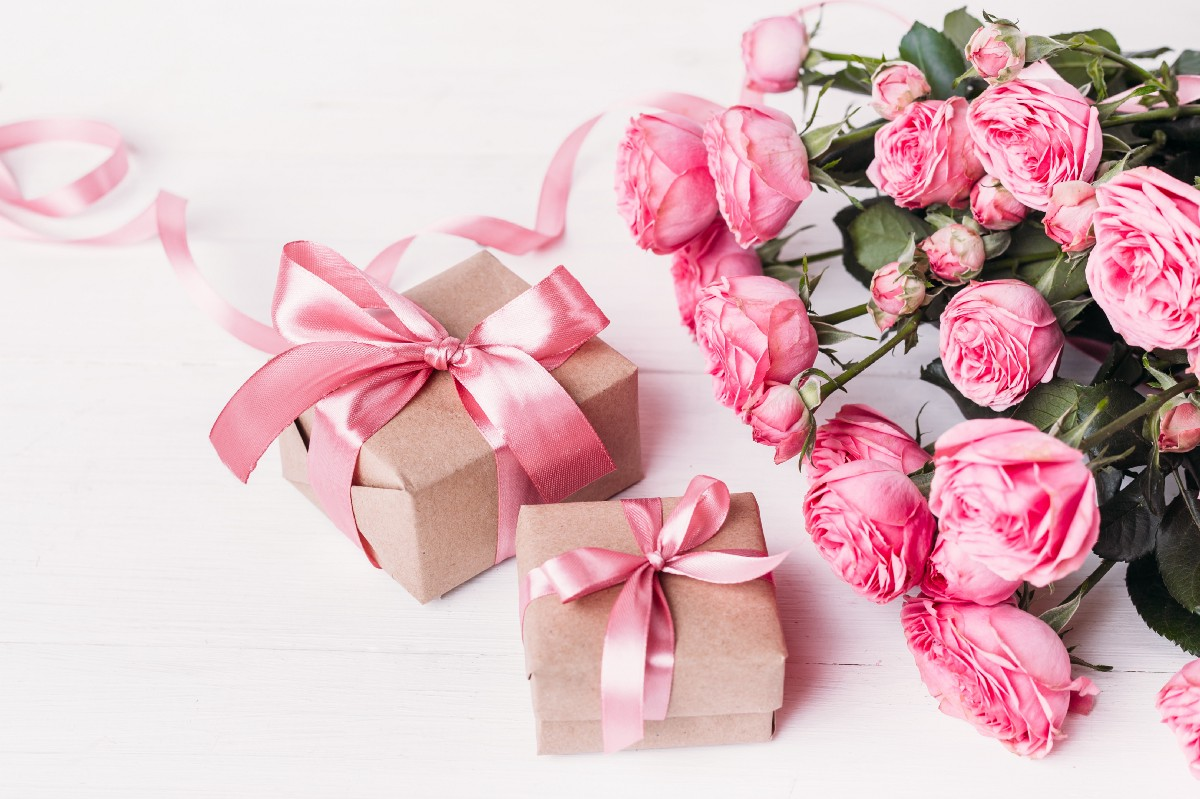

<center> Image by Katsiaryna Liuntova on Vecteezy </center>

## Why should I mine Product Reviews?

Have you ever wanted to buy a gift for your loved one,  but have never been sure? Have you felt confused reading the mixed reviews on product sites, not knowing what to take, and to leave? 
In this case, I am trying to buy a pair of tennis shoes for someone in my family. You might have noticed that there are often mind-boggling advertisements for sports products having celebrities. I have personally found them overwhelming and confusing.
As a result, I just end up picking one and hoping that it turns out to be the best one!

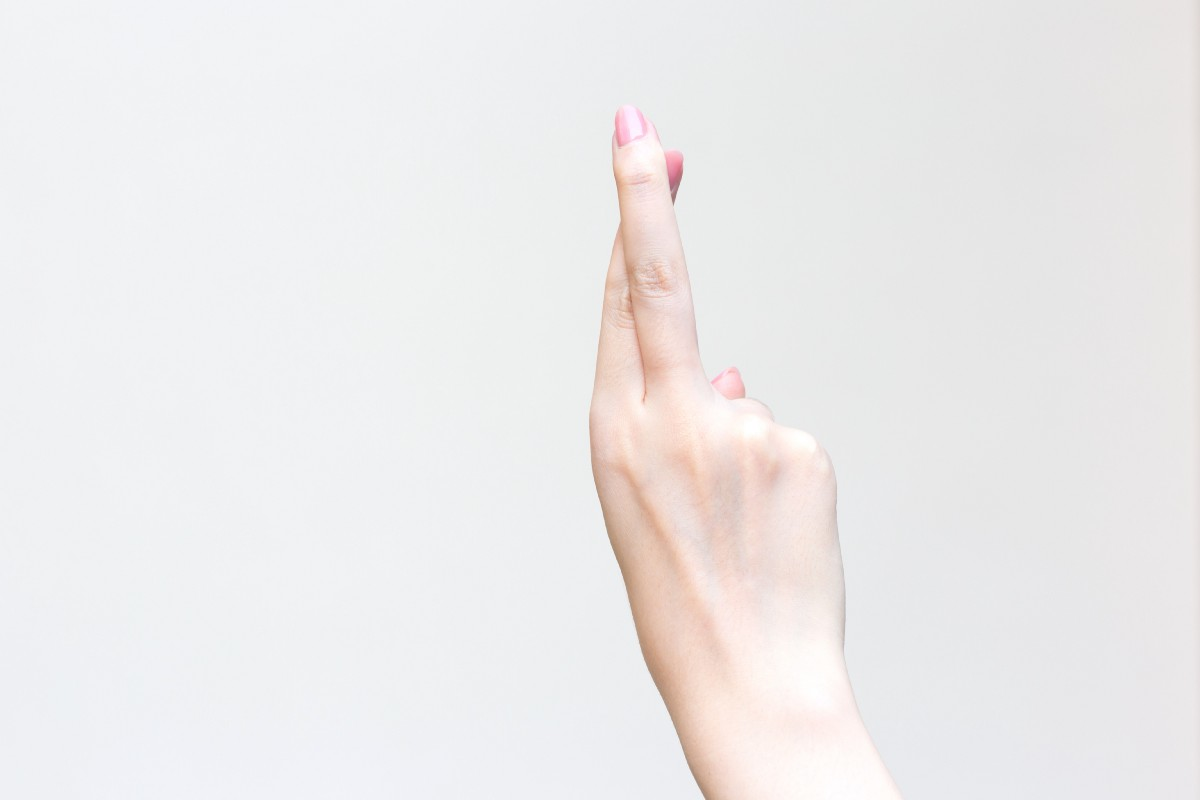
<center> Image by Nut Intawiphan on Vecteezy </center>

# Who is this article for?

This article is intended for those data nerds who may have some difficulty parsing complex data structures. A lot of people who actually want to code may not have the right tools to do so. In some cases, they just need a nudge in the right direction. This article is written for those who really need to learn data parsing. There are a myriad of libraries like itertools that could help with parsing; but the real fun lies in doing it step by step. <b> Beware </b> that the article is lengthy because I've tried to provide visual guides where possible so that anyone trying this out can follow along. 
 

# Objective

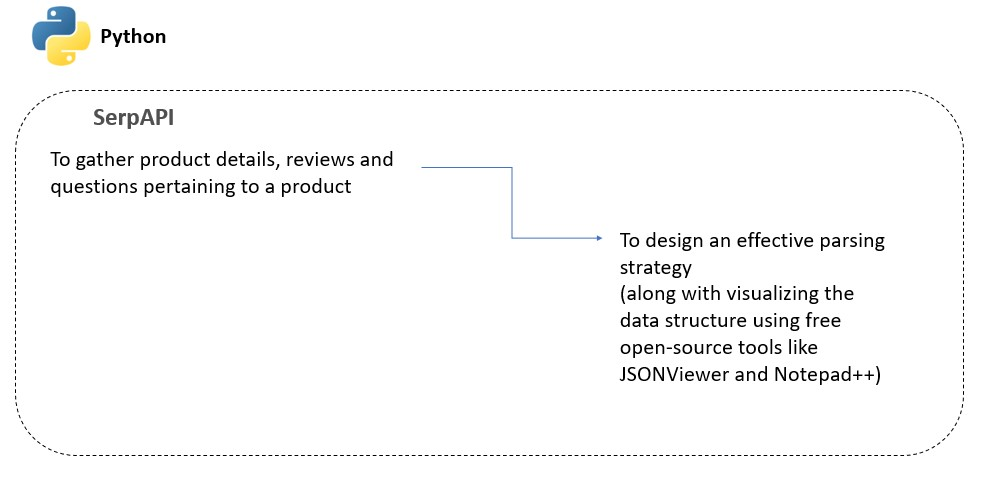
<center> Overall Objective </center>

# Pre-requisites

Please get yourself a Google API key by following the steps in the <a href = "https://developers.google.com/apis-explorer"> Google Developer Pages. </a> We will be using Serpapi for this. Please refer to the <a href = "https://serpapi.com/"> SERPAPI pages</a> to learn more about its capabilities.

In [124]:
import pandas as pd
api_key = pd.read_csv('Google_API_Key.txt',sep=',',header=None)
from serpapi import GoogleSearch

In [133]:
page_num = 10 # The number of pages that you want Google to return results for
temp_dict = {}
resultsList = [] # A list

for i in range(page_num):
    params = {
      "api_key": api_key[0][0],
      "engine": "google",
      "q": "Men's Tennis shoes",
      "google_domain": "google.com",
      "gl": "us",
      "hl": "en",
      "num": "100",
      "start": i #Pagination - Page Number
    }
    search = GoogleSearch(params)
    temp_dict = search.get_dict()
    resultsList.append(temp_dict)  # We append the dictionary to a list resulting in a list of dictionaries 

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


## Now, that looks complex, doesn't it? - Let's break the complexity

In [134]:
print(resultsList)

[{'search_metadata': {'id': '63213a7d033e949235fb943e', 'status': 'Success', 'json_endpoint': 'https://serpapi.com/searches/142d830cbd266374/63213a7d033e949235fb943e.json', 'created_at': '2022-09-14 02:20:45 UTC', 'processed_at': '2022-09-14 02:20:45 UTC', 'google_url': 'https://www.google.com/search?q=Men%27s+Tennis+shoes&oq=Men%27s+Tennis+shoes&hl=en&gl=us&num=100&start=0&sourceid=chrome&ie=UTF-8', 'raw_html_file': 'https://serpapi.com/searches/142d830cbd266374/63213a7d033e949235fb943e.html', 'total_time_taken': 2.09}, 'search_parameters': {'engine': 'google', 'q': "Men's Tennis shoes", 'google_domain': 'google.com', 'hl': 'en', 'gl': 'us', 'start': 0, 'num': '100', 'device': 'desktop'}, 'search_information': {'organic_results_state': 'Results for exact spelling', 'query_displayed': "Men's Tennis shoes", 'total_results': 219000000, 'time_taken_displayed': 1.28, 'menu_items': [{'position': 1, 'title': 'All'}, {'position': 2, 'title': 'Shopping', 'link': 'https://www.google.com/search?

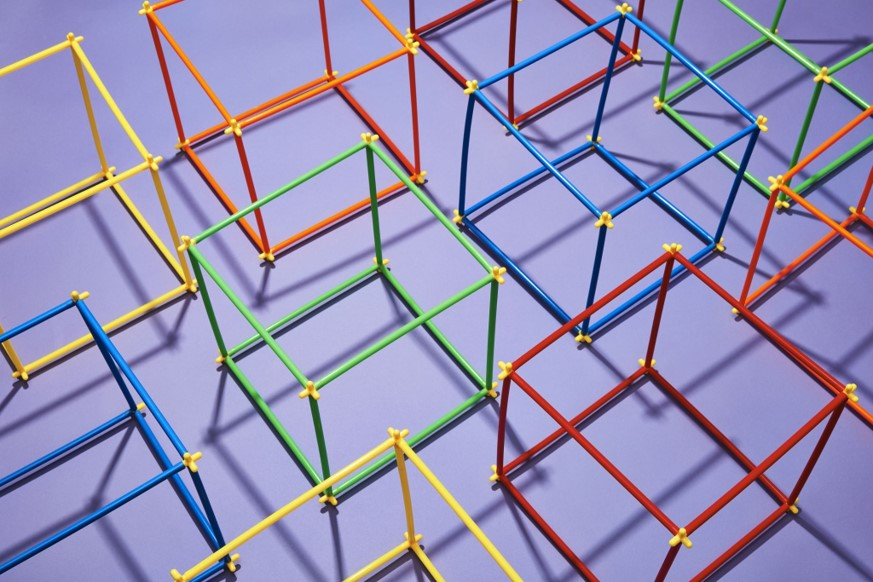
<center> Microsoft Stock Image <center>

## Parsing the list of Dictionaries

I do not want to make the assumption that everyone reading the article is an expert in parsing a 'list of dictionaries' and getting what they want. I do not want to assume that. Hence, I am going to be walking through in detail how I parse the data to get what I need. 

I don't care if this article turns out to be more lengthy than necessary as a result. Even if one person finds this useful, I am more than happy. If you are on the verge of giving up seeing the complexity of the result, hold on for a bit and read on. It's no rocket science.

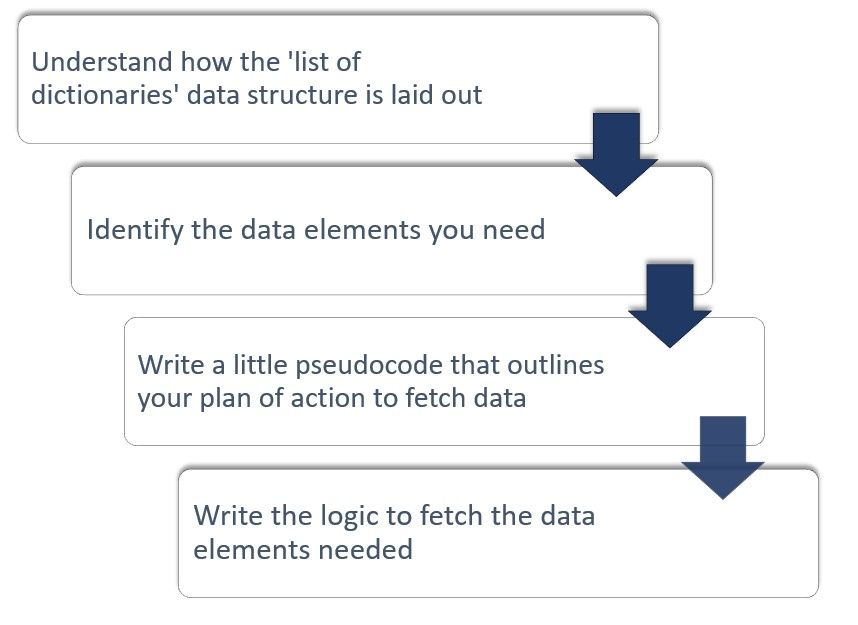

<center>Image - Generated by Author </center>

### Understand how the 'list of dictionaries' data structure is laid out

I use tools to visualize such complex results. One tool I recommend using is http://jsonviewer.stack.hu/.
To do this, just copy and paste the entire content of 'resultList' in the 'Text' tab. Below is a partial of what it looks like - 

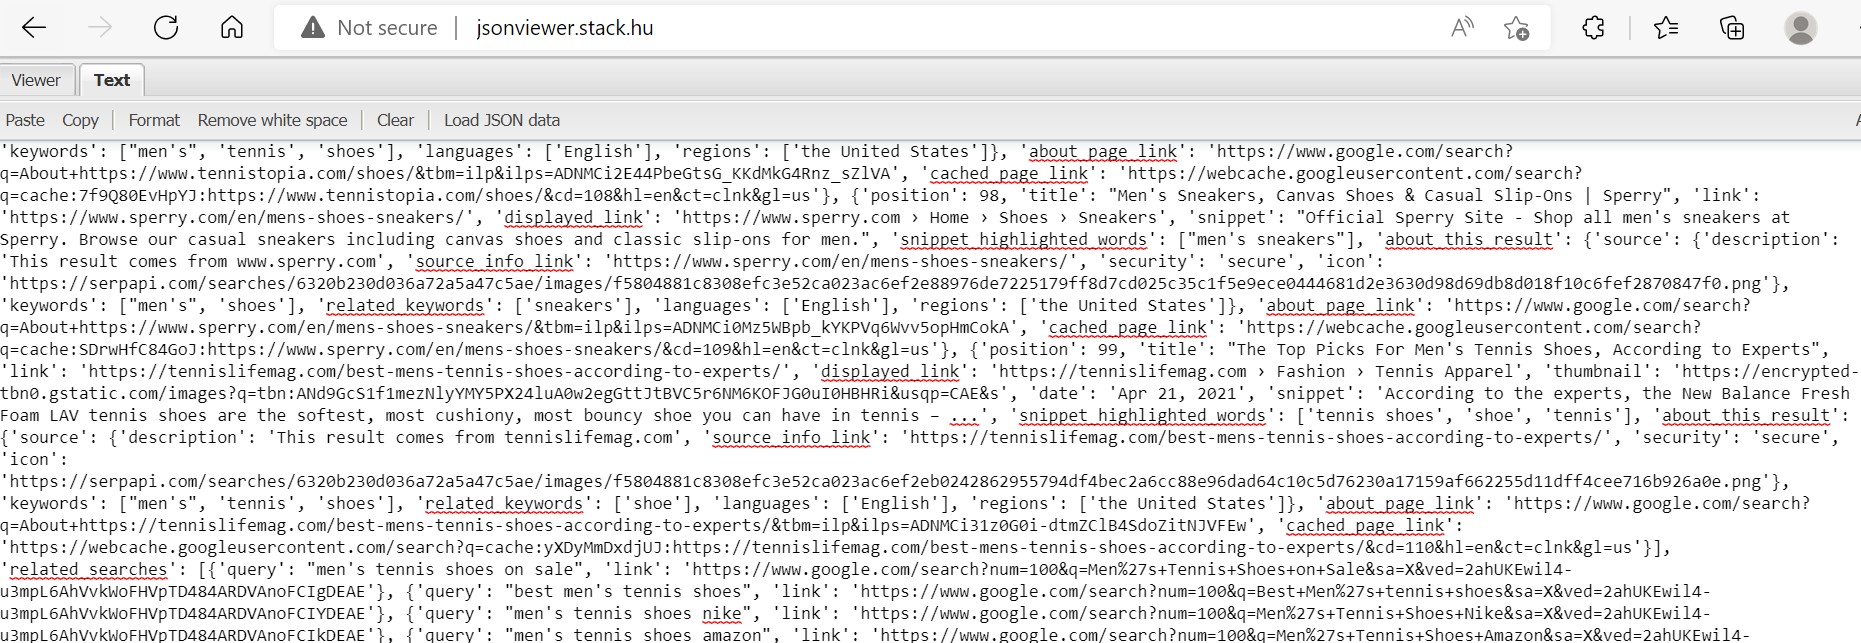

Click on 'Format'. This results in a nicely formatted list of dictionaries enabling you to clearly see the nesting. Below is a partial view after being formatted. 

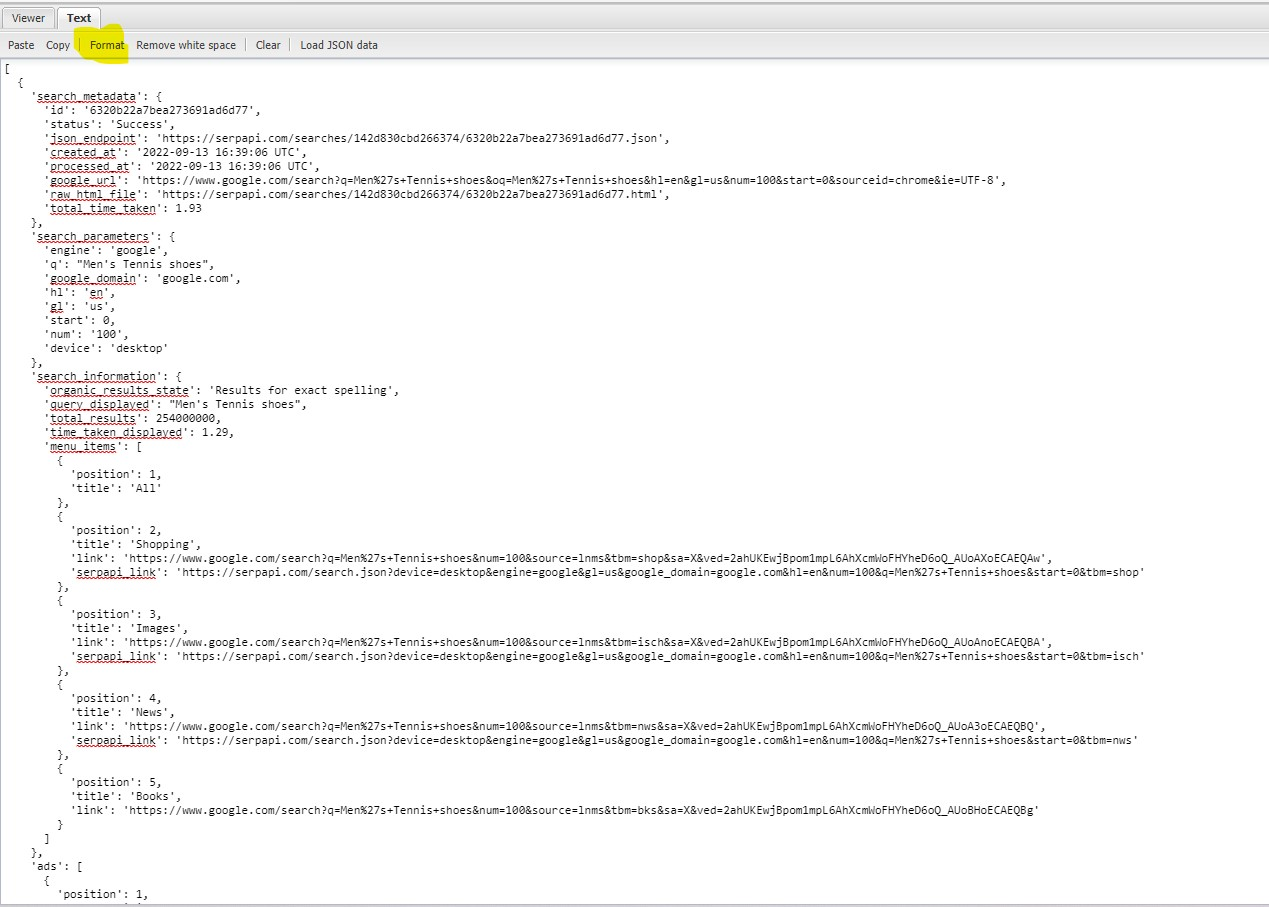

You can now copy and paste this formatted data in a text editor such as Notepad++ to clearly understand the beginning and end of each element and the nested elements within it. Notepad++ clearly highlights the start and end of a bracket to enable you to understand elements within a dictionary.  

<b> Important: </b> The JSON structure that we have obtained from the API call has single-quotes in its key values. But most JSON viewers expext to have double-quotes in their key values. So, if you would like to use the 'Viewer' tab in the JSON Viewer tab or the JSON language option in 'Notepad++', you can replace the single-quotes with double-quotes. Another option would be to choose 'JSON' in the 'Language' Menu in Notepad++. It provides expand and collapse features to be able to better understand the layered structure of data.

Using Notepad++'s Language ->JSON feature, we understand that the structure of the data is as below.

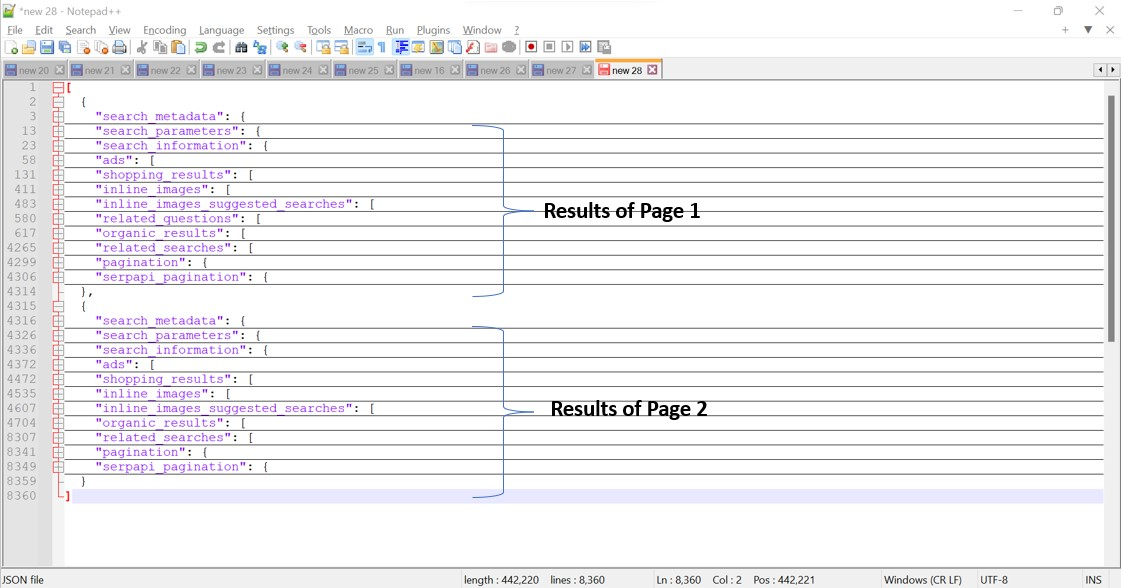
<center> High-level Layout of the data output </center> 

### Identify the data elements you need 

In this case, we need only the following lists-

<li> shopping_results
<li> related_questions
<li> related_searches
    
I would have been interested in the 'organic_results' but I am fine to use the shopping_results for now.

An important thing to note here is that each of the above lists that we have shortlisted is yet another list of dictionaries. Let's take a closer look. Here is a snapshot of the 'shopping_results' structure alone, with its children in a collapsed view.

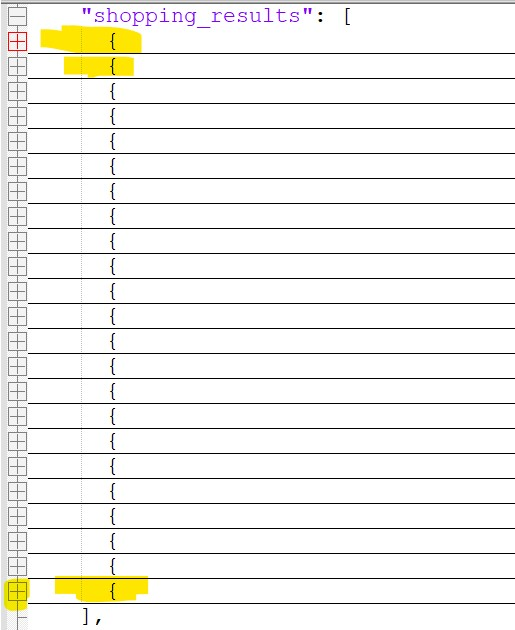
<center> Structure of 'shopping_results' with children in a collapsed view</center>

Now, do we need all the data within each of these lists? NO. Let's analyze each list of dictionary to determine what is truly needed.

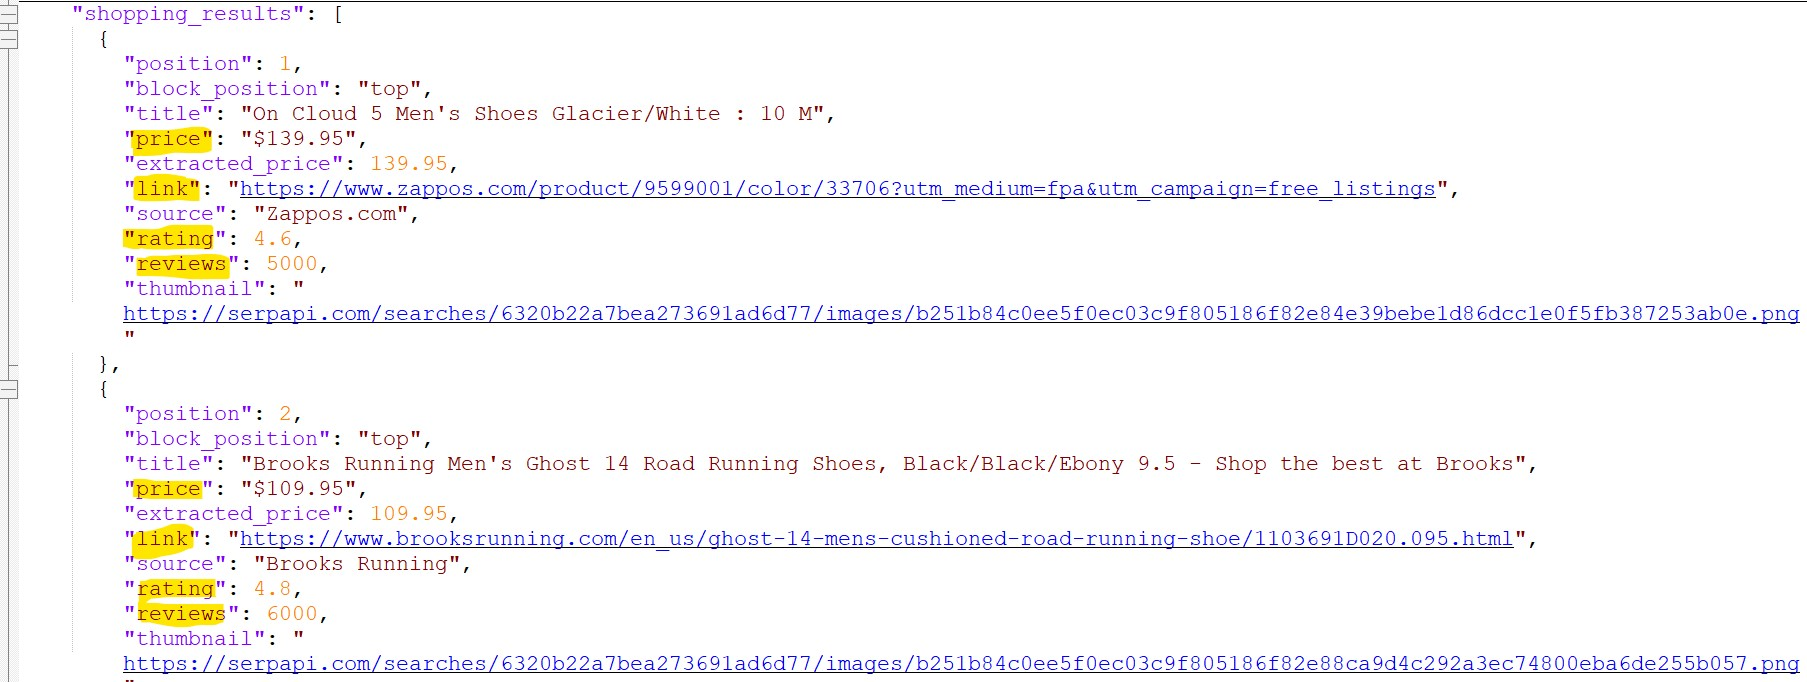
<center>Stuff Needed in Shopping Results </center>

On repeating this process for related_questions and related_searches, I now know what I need. This is a high-level layout of what I wish to gather (and what will be important for our analysis) from each of these data elements -

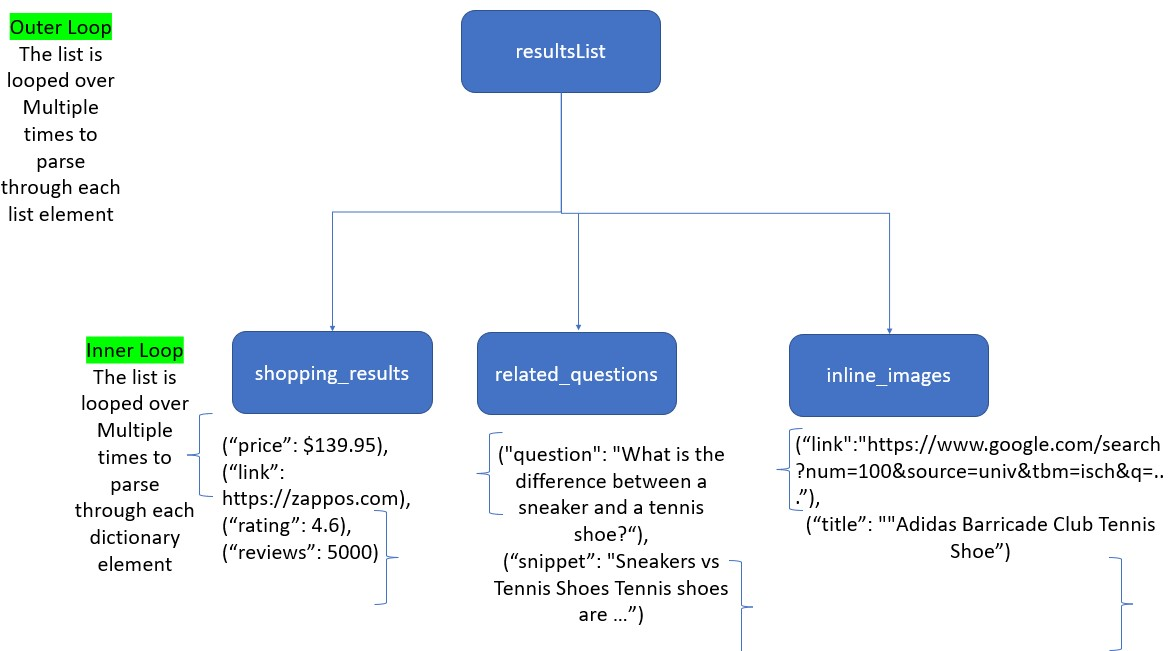
<center>Layout of the Approach </center>

### Write a little pseudocode that outlines your plan of action to fetch data


1. Loop through the resultsList which is a list of dictionary (we can call it the Master list of dictionary for now - keep in mind, this is not a standard term)
2. Access the 1st layer which has the child lists -  shopping_results, related_questions and inline_images (Each being a list of dictionary)
3. Create a dataframe for each of shopping_results, related_questions and inline_images

4. Loop through the <br>
      3a. shopping_results
             - Fetch the specific dictionary items - price, link, rating, reviews
             - Create a tuple of these items
             - Append the resulting tuple to a dataframe
     
     3b. related_questions
             - Fetch the dictionary items - question and snippet
             - Create a tuple of these items
             - Append the resulting tuple to a dataframe
                  
     3c. inline_images
             - Fetch the dictionary items - link and title
             - Create a tuple of these items
             - Append the resulting tuple to a dataframe
                   
5. Append the shopping_results to the Dataframe

### Write the logic to fetch the data elements needed

Now, Follow along the pseudocode and write the logic to parse through the data structure.

#### Gathering Shopping_Results_Data

In [135]:
Shopping_Results_Data = pd.DataFrame(columns = ('price','link','rating','reviews'))

for list_element in resultsList: #Iterate through the list - 1st Loop mentioned in the pseudocode
    if 'shopping_results'in list_element.keys():
        for child_list_element in (list_element['shopping_results']): # Access the 1st layer which has the child lists 
            price = ''
            link = ''
            rating = ''
            reviews = ''
            if 'price' in child_list_element.keys(): # Check to see if the 'price' key exists in the dictionary
                price = child_list_element['price']
            if 'link' in child_list_element.keys(): # Check to see if the 'link' key exists in the dictionary
                link = child_list_element['link']
            if 'rating' in child_list_element.keys(): 
                rating = child_list_element['rating']
            if 'reviews' in child_list_element.keys():
                reviews = child_list_element['reviews']            
            Tuple = {'price':price,'link':link,'rating':rating,'reviews':reviews} # Construct a tuple to hold a set of values for each iteration
            Shopping_Results_Data = Shopping_Results_Data.append(Tuple,ignore_index=True) # Append the tuple to the dataframe

In [136]:
Shopping_Results_Data

,price,link,rating,reviews
0,$109.95,https://www.brooksrunning.com/en_us/ghost-14-m...,4.8,6000
1,$139.95,https://www.zappos.com/product/9599001/color/3...,4.8,29
2,$45.00,https://www.adidas.com/us/questar-flow-nxt-sho...,,
3,$94.95,https://thefitville.com/products/fitville-mens...,4.7,51
4,$59.99,https://www.academy.com/p/asics-men%E2%80%99s-...,4.4,763
5,$49.95,https://www.amazon.com/Skechers-Energy-Afterbu...,,
6,$50.00,https://www.beallsflorida.com/online/fila-mens...,,
7,$45.00,https://www.adidas.com/us/questar-flow-nxt-sho...,,
8,$49.99,https://www.academy.com/p/adidas-mens-gamecour...,4.2,9
9,$139.95,https://www.zappos.com/product/9599001/color/3...,4.8,29


#### Gathering related_questions

Here, we could use pretty much the same logic as for 'Shopping_Results_Data'. Let's try using the same logic here 

related_questions = pd.DataFrame(columns = ('question','snippet'))

for list_element in resultsList: #Iterate through the list - 1st Loop mentioned in the pseudocode
    for child_list_element in (list_element['related_questions']): # Access the 1st layer which has the child lists 
        question = ''
        snippet = ''
        if 'question' in child_list_element.keys(): # Check to see if the 'price' key exists in the dictionary
            question = child_list_element['question']
        if 'snippet' in child_list_element.keys(): # Check to see if the 'link' key exists in the dictionary
            snippet = child_list_element['snippet']
            Tuple = {'question':question,'snippet':snippet} # Construct a tuple to hold a set of values for each iteration
            related_questions = related_questions.append(Tuple,ignore_index=True) # Append the tuple to the dataframe '''

We end up getting a <b><i> keyerror</i> </b> as shown below. What are the possible reasons for this?

KeyError                                  Traceback (most recent call last)
~\AppData\Local\Temp/ipykernel_33580/38121158.py in <module>
      2 
      3 for list_element in resultsList: #Iterate through the list - 1st Loop mentioned in the pseudocode
----> 4     for child_list_element in (list_element['related_questions']): # Access the 1st layer which has the child lists
      5         question = ''
      6         snippet = ''

KeyError: 'related_questions'

Possible reasons could be 1. The key is not in the same level as 'shopping_results' (or) 2. The key may not exist always.

Let's check for the possibility of 1.

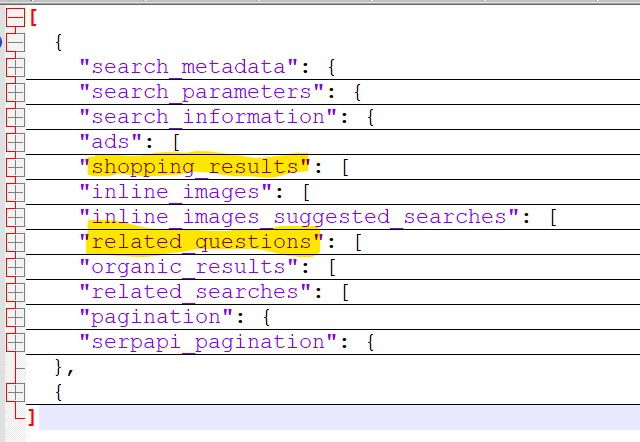

The only other option is that in some cases, the key may not exist. So, we just need to handle the same using the simple catch all logic if 'related_questions' in resultsList.keys().

#### Important Note: With the pagination set to 2, the API calls did not give a keyerror for 'shopping_results'. But with the pagination set to 10, there seem to be JSON responses that do not have the 'shopping_results'. Hence, the catch all logic is being applied to all three list elements whose data are being gathered.

In [139]:
related_questions = pd.DataFrame(columns = ('question','snippet'))

for list_element in resultsList: #Iterate through the list - 1st Loop mentioned in the pseudocode
    if 'related_questions' in list_element.keys():
        for child_list_element in (list_element['related_questions']): # Access the 1st layer which has the child lists 
            question = ''
            snippet = ''
            if 'question' in child_list_element.keys(): # Check to see if the 'price' key exists in the dictionary
                question = child_list_element['question']
            if 'snippet' in child_list_element.keys(): # Check to see if the 'link' key exists in the dictionary
                snippet = child_list_element['snippet']
            Tuple = {'question':question,'snippet':snippet} # Construct a tuple to hold a set of values for each iteration
            related_questions = related_questions.append(Tuple,ignore_index=True) # Append the tuple to the dataframe '''

In [140]:
related_questions

,question,snippet
0,What tennis shoes are the best?,
1,What is the best mens tennis shoes to work in?,
2,What is the difference between a sneaker and a...,Sneakers vs Tennis Shoes Tennis shoes are tech...
3,What's special about tennis shoes?,Tennis shoes are typ-ically more flat with spe...


#### Gathering data related to inline images

In [141]:
inline_image_data = pd.DataFrame(columns = ('link','title'))

for list_element in resultsList: #Iterate through the list - 1st Loop mentioned in the pseudocode
    if 'inline_images'in list_element.keys():
        for child_list_element in (list_element['inline_images']): # Access the 1st layer which has the child lists 
            link = ''
            title = ''
            if 'link' in child_list_element.keys(): # Check to see if the 'price' key exists in the dictionary
                link = child_list_element['link']
            if 'title' in child_list_element.keys(): # Check to see if the 'link' key exists in the dictionary
                title = child_list_element['title']
            Tuple = {'link':link,'title':title} # Construct a tuple to hold a set of values for each iteration
            inline_image_data = inline_image_data.append(Tuple,ignore_index=True) # Append the tuple to the dataframe '''

In [142]:
inline_image_data

,link,title
0,https://www.google.com/search?num=100&ucbcb=1&...,The 8 Very Best Men’s Tennis Shoes
1,https://www.google.com/search?num=100&ucbcb=1&...,Adidas Barricade Club Tennis Shoe
2,https://www.google.com/search?num=100&ucbcb=1&...,The 10 Best Men's Tennis Shoes For 2022 - [In ...
3,https://www.google.com/search?num=100&ucbcb=1&...,Fresh Foam X Lav V2
4,https://www.google.com/search?num=100&ucbcb=1&...,"8 Best Men's Tennis Shoes, Reviewed 2022 | The..."
...,...,...
85,https://www.google.com/search?num=100&source=u...,Mens Tennis Shoes | Mens Athletic Shoes | Tenn...
86,https://www.google.com/search?num=100&source=u...,Nike Air Zoom Resistance Men's Tennis Shoes
87,https://www.google.com/search?num=100&source=u...,"Rospick Slip On Men's Sneakers, Walking Shoes ..."
88,https://www.google.com/search?num=100&source=u...,Mens Tennis Shoes | Mens Athletic Shoes | Tenn...


## Concluding Notes

We've now gathered the data that we need. The objective of this article was to help the audience visualize data structures to be able to write the associated parsing logic. This is especially useful for people who may be struggling to visualize and hold a mental note of data structures while also trying to write logic.

The analysis of this data is being moved to part 2, and can be accessed here.